In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install dclab

/usr/local/lib/python3.7/dist-packages/dclab/rtdc_dataset/config.py:79: WrongConfigurationTypeWarning: Type of confguration key [imaging]: roi position x should be <class 'numbers.Integral'>, got <class 'numpy.float64'>!
  WrongConfigurationTypeWarning)
/usr/local/lib/python3.7/dist-packages/dclab/rtdc_dataset/config.py:79: WrongConfigurationTypeWarning: Type of confguration key [imaging]: roi position y should be <class 'numbers.Integral'>, got <class 'numpy.float64'>!
  WrongConfigurationTypeWarning)


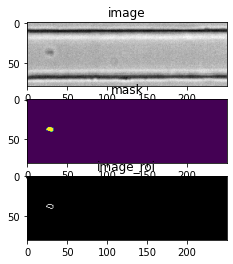

In [68]:
import dclab
ds = dclab.new_dataset("/content/gdrive/MyDrive/de_job_application/Data002.rtdc")

idx = 5
image = ds["image"][idx]
mask = ds["mask"][idx]
contour = ds["contour"][idx]

image_contour = np.zeros(ds["image"][idx].shape)
for contour_idx in contour:
  image_contour[contour_idx[1],contour_idx[0]] = 1
image_contour = image * image_contour

ax1 = plt.subplot(311, title="image")
ax2 = plt.subplot(312, title="mask")
ax3 = plt.subplot(313, title="image_roi")

ax1.imshow(ds["image"][idx], cmap="gray")
ax2.imshow(ds["mask"][idx])
ax3.imshow(image_contour, cmap="gray")

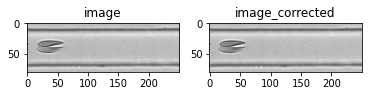

0.011875
True False


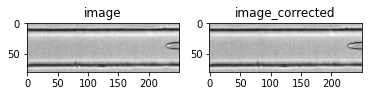

0.10125
True False


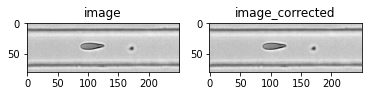

0.131875
True False


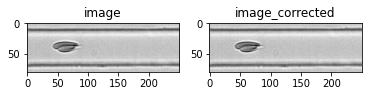

0.145
True False


In [92]:
# Take first 5 images for the example. Full length should be len(ds["image"])
for i in range (1,5):
  image = ds["image"][i]
  mask = ds["mask"][i]

  image_0 = ds["image"][i-1]
  mask_0 = ds["mask"][i-1]  
  
  bright_bg_avg_1 = np.mean(image[(1-mask)*(1-mask_0)])
  bright_bg_avg_0 = np.mean(image_0[(1-mask)*(1-mask_0)])  

  image_corrected = image - (bright_bg_avg_1 - bright_bg_avg_0)

  plt.subplot(121, title="image")
  plt.imshow(image, cmap="gray")

  plt.subplot(122, title="image_corrected")
  plt.imshow(image_corrected, cmap="gray")

  plt.show()
  print(ds['time'][i])

# New Section